### Model

|Type              | Symbol         | Description     |
|:-----------------|:--------------:|:----------------|
|                  | $O_{j}(t,\lambda)$  | observed signal from the $j$-th laser at time $t$ at spectral wavelength $\lambda$  | 
|Constant          | $s_{i}(\lambda)$    | emission spectrum of sensor associated with $i$-th neuromodulator                   | 
|Constant          | $e_{j}(\lambda)$    | time-invariant spectral signature of $j$-th excitation laser                        | 
|Parameter         | $w_{ij}$            | emission efficiency of $i$-th neuromodulator excited by $j$-th laser                | 
|Parameter         | $a_{i}(t)$          | sensor signal from time varying amount for the $i$-th neuromodulator                | 
|Parameter         | $n_{j}(t)$          | noise from $j$-th laser                                                             | 
|Parameter         | $b_{j}(\lambda)$    | fiber fluorescence triggered by $j$-th laser                                        | 
|Parameter         | $m(t)$              | motion correction (potentially depends on $i$)                                      | 


\begin{align*}
O_{j}(t,\lambda)  &= \{ \left( \sum_{i \in \{\textrm{sensors}\},\textrm{autofluorescence}}{\left(a_{i}(t)s_{i}({\lambda})w_{ij}\right)} + e_{j}(\lambda) \right) &\\
& \times \left( h_{\textrm{oxy}}(t)\mu_{\textrm{oxy}}(\lambda)
+ h_{\textrm{deoxy}}(t)\mu_{\textrm{deoxy}}(\lambda) \right) \times m(t) &\\
&+ b_{j}(\lambda) \} \times n_{j}(t)
\end{align*}


- $a_{i}(t)$ for  $i \in \textrm{autofluorescence}$ is slow
- $a_{i}(t)$ for  $i \in \textrm{sensors}$ can be fast (prior: 50 ms to 1 s) or slow (prior: 10 s to 50 s)
- $a_{i}(t) := c_{i}\{f(t)s_\textrm{bright}(\lambda) + (1-f(t))s_\textrm{dark}(\lambda)\}$ : a single sensor population exists in two states (e.g. bright and dark) that have their own emission spectra (also see Isosbestic point).
- $n_{j}(t)$ : white noise spectrum, power mostly in high frequency components.
- $h_{\textrm{oxy}}(t), h_{\textrm{deoxy}}(t)$ : Slow dynamics, with the fastest dynamics occurring at 0.5 Hz
- For each $j$, a spectral band (around excitation wavelength $\lambda^{\dagger}_{j}$ ) has no information because the pixels are saturated. The diffraction pattern around these pixels is dominated by signal from the laser itself. This might provide an approximation for terms like $h_{\textrm{oxy}}(t)$ ... etc. These could be used as inputs instead of parameters to fit in the above equation.


$$
\def\lexc{\lambda^{\dagger}_{j}}
O_{j}(t,\lexc) = [e_{j}(\lexc) \times\{
h_{\textrm{oxy}}(t)\mu_{\textrm{oxy}}(\lexc)
+h_{\textrm{deoxy}}(t)\mu_{\textrm{deoxy}}(\lexc)\} \times m(t) + b_{j}(\lexc)] \times{n_{j}(t)}$$


In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import seaborn as sns
import torch
sns.set()

/home/rohan/miniconda3/envs/sourcesep/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
# O has shape n_channels (j), time (t), spectrum (lam)
from sourcesep.sim import emission_spectrum

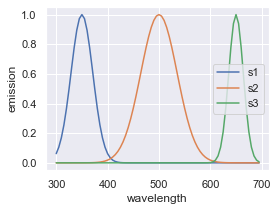

In [14]:
# Simulated emission spectra
lam_range = np.arange(300, 700, 5)

s1 = emission_spectrum(lam_peak=350, lam_sigma=30, lam_range=lam_range)
s2 = emission_spectrum(lam_peak=500, lam_sigma=50, lam_range=lam_range)
s3 = emission_spectrum(lam_peak=650, lam_sigma=20, lam_range=lam_range)

f, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(lam_range, s1, label='s1')
ax.plot(lam_range, s2, label='s2')
ax.plot(lam_range, s3, label='s3')
ax.set(xlabel='wavelength', ylabel='emission')
plt.legend()
plt.show()


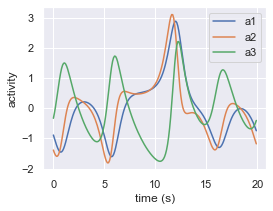

In [29]:
from dysts.flows import Lorenz

t = np.arange(0, 20, 0.1)
n_samples = t.size
model = Lorenz()
a = model.make_trajectory(n_samples, pts_per_period=100,
                          resample=True, standardize=True)
a1 = a[:, 0]
a2 = a[:, 1]
a3 = a[:, 2]

f, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.plot(t, a1, label='a1')
ax.plot(t, a2, label='a2')
ax.plot(t, a3, label='a3')
ax.set(xlabel='time (s)', ylabel='activity')
plt.legend()
plt.show()
